In [1]:
from scipy import *
import numpy as np
from pylab import *

In [3]:
import fieldize
nval=10000
nbin=10
ndim=2
pos, value, field = rand(nval,ndim)*(nbin-5), ones(nval), zeros(shape=(nbin+1,nbin+1))
x,y=pos.T
ifield=fieldize.cic(pos, value, field, periodic=1)

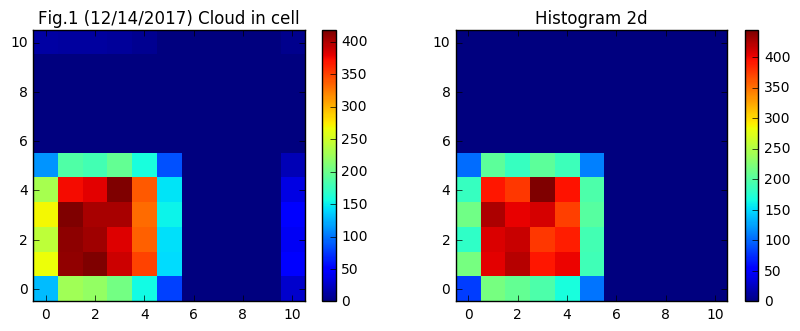

In [14]:
figure(figsize=(10,3.5))
subplot(121)
imshow(ifield,origin='lower',interpolation='nearest')
title('Fig.1 (12/14/2017) Cloud in cell')
colorbar()
subplot(122)
ihist2d=histogram2d(x,y,bins=[arange(-0.5,11),arange(-0.5,11)])[0]
imshow(ihist2d,origin='lower',interpolation='nearest')
title('Histogram 2d')
colorbar()
show()

In [17]:
nudir='/Users/jia/Documents/weaklensing/nubias/'
k512,pk512=load(nudir+'kpk_512grid.npy')
k128,pk128=load(nudir+'kpk_128grid.npy')
k256,pk256=load(nudir+'kpk_256grid.npy')

kful,pkful=genfromtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/matterpower/mnv0.10000_om0.30000_As2.1000/powerspec_tot_066.txt').T
knu,pknu=genfromtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/matterpower/mnv0.10000_om0.30000_As2.1000/powerspec_nu_066.txt').T
fnu=0.1/93.14/0.3/.7**2
pkdm=(sqrt(pkful)-fnu*sqrt(pknu))**2/(1-fnu)**2
ks, ps, Ns = genfromtxt(nudir+'Pk_snapshot_066_idmod_101_0.hdf5_Ng512.txt').T

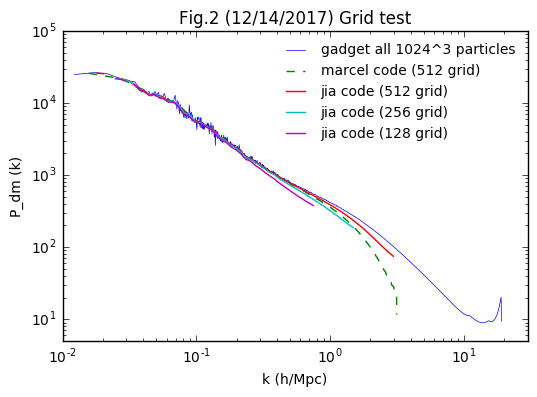

In [26]:
loglog(kful*1e3,pkdm/1e9,'-',lw=0.5, label='gadget all 1024^3 particles')
loglog(ks,ps,'--', label='marcel code (512 grid)')
loglog(k512,pk512, label='jia code (512 grid)')
loglog(k256,pk256, label='jia code (256 grid)')
loglog(k128,pk128, label='jia code (128 grid)')
legend(fontsize=10,frameon=0)
title('Fig.2 (12/14/2017) Grid test')
xlim(1e-2,30)
ylim(5,1e5)
xlabel('k (h/Mpc)')
ylabel('P_dm (k)')
show()

In [83]:
Parr00_z1 = load('Phh/Phh_mnv0.00000_om0.30000_As2.1000_048.npy')
Parr00_z0 = load('Phh/Phh_mnv0.00000_om0.30000_As2.1000_066.npy')

Parr01_z1 = load('Phh/Phh_mnv0.10000_om0.30000_As2.1000_048.npy')
Parr01_z0 = load('Phh/Phh_mnv0.10000_om0.30000_As2.1000_066.npy')

Parr06_z1 = load('Phh/Phh_mnv0.60000_om0.30000_As2.1000_048.npy')
Parr06_z0 = load('Phh/Phh_mnv0.60000_om0.30000_As2.1000_066.npy')

In [90]:
mcut=arange(11.0, 15.5, 0.5)
mbins=arange(11,15)

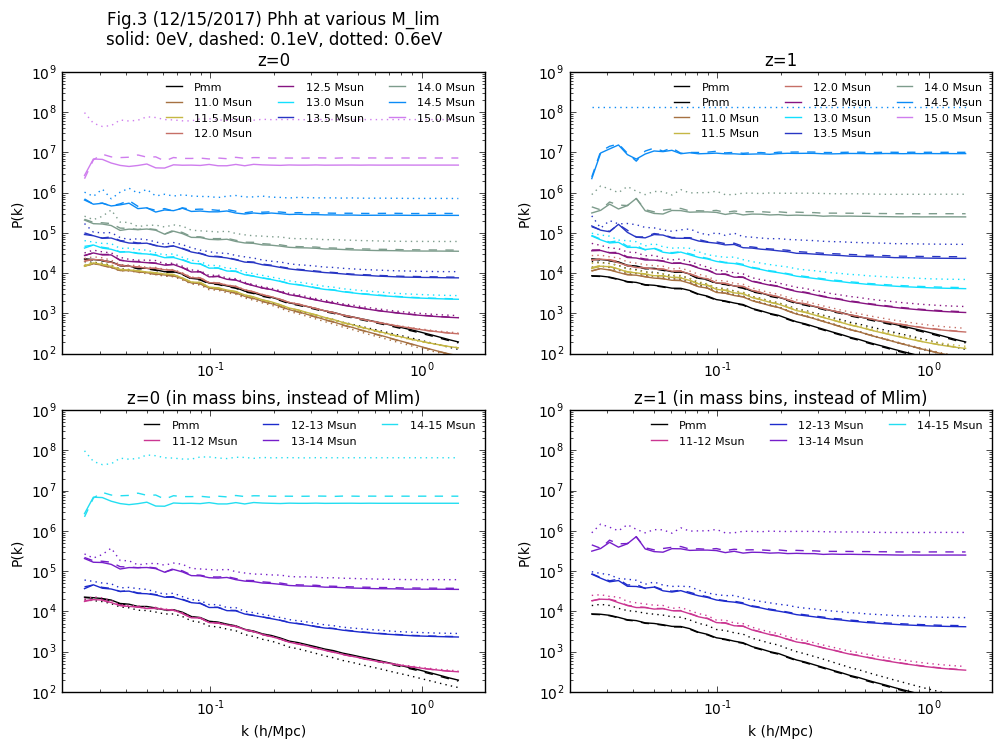

In [97]:
iseed=10025
figure(figsize=(12,8))

seed(iseed)
subplot(221)
icolor='k'
loglog(Parr00_z0[0],Parr00_z0[1],'-',color=icolor,label='Pmm')
loglog(Parr01_z0[0],Parr01_z0[1],'--',color=icolor)
loglog(Parr06_z0[0],Parr06_z0[1],':',color=icolor)

i=2
for imcut in mcut:
    i+=1
    icolor=rand(3)
    loglog(Parr00_z0[0],Parr00_z0[i],'-',color=icolor,label='%s Msun'%(imcut))
    loglog(Parr01_z0[0],Parr01_z0[i],'--',color=icolor)
    loglog(Parr06_z0[0],Parr06_z0[i],':',color=icolor)
legend(fontsize=8,frameon=0,loc=0,ncol=3)
title('''Fig.3 (12/15/2017) Phh at various M_lim
solid: 0eV, dashed: 0.1eV, dotted: 0.6eV
z=0''')
ylabel('P(k)')
xlim(2e-2,2)
ylim(1e2,1e9)

seed(iseed)
subplot(222)
icolor='k'
loglog(Parr00_z0[0],Parr00_z0[1],'-',color=icolor,label='Pmm')
loglog(Parr01_z0[0],Parr01_z0[1],'--',color=icolor)
loglog(Parr06_z0[0],Parr06_z0[1],':',color=icolor)
icolor='k'
loglog(Parr00_z1[0],Parr00_z1[1],'-',color=icolor,label='Pmm')
loglog(Parr01_z1[0],Parr01_z1[1],'--',color=icolor)
loglog(Parr06_z1[0],Parr06_z1[2],':',color=icolor)
i=2
for imcut in mcut:
    i+=1
    icolor=rand(3)
    loglog(Parr00_z1[0],Parr00_z1[i],'-',color=icolor,label='%s Msun'%(imcut))
    loglog(Parr01_z1[0],Parr01_z1[i],'--',color=icolor)
    loglog(Parr06_z1[0],Parr06_z1[i],':',color=icolor)
legend(fontsize=8,frameon=0,loc=0,ncol=3)
xlim(2e-2,2)
ylim(1e2,1e9)
title('z=1')
ylabel('P(k)')


subplot(223)
icolor='k'
loglog(Parr00_z0[0],Parr00_z0[1],'-',color=icolor,label='Pmm')
loglog(Parr01_z0[0],Parr01_z0[1],'--',color=icolor)
loglog(Parr06_z0[0],Parr06_z0[1],':',color=icolor)
seed(iseed+5)
i=12
for imbin in mbins:
    i+=1
    icolor=rand(3)
    loglog(Parr00_z0[0],Parr00_z0[i],'-',color=icolor,label='%s-%s Msun'%(imbin,imbin+1))
    loglog(Parr01_z0[0],Parr01_z0[i],'--',color=icolor)
    loglog(Parr06_z0[0],Parr06_z0[i],':',color=icolor)
legend(fontsize=8,frameon=0,loc=0,ncol=3)
xlabel('k (h/Mpc)')
ylabel('P(k)')
xlim(2e-2,2)
ylim(1e2,1e9)
title('z=0 (in mass bins, instead of Mlim)')

seed(iseed+5)
subplot(224)
icolor='k'
loglog(Parr00_z1[0],Parr00_z1[1],'-',color=icolor,label='Pmm')
loglog(Parr01_z1[0],Parr01_z1[1],'--',color=icolor)
loglog(Parr06_z1[0],Parr06_z1[2],':',color=icolor)
i=12
for imbin in mbins:
    i+=1
    icolor=rand(3)
    loglog(Parr00_z1[0],Parr00_z1[i],'-',color=icolor,label='%s-%s Msun'%(imbin,imbin+1))
    loglog(Parr01_z1[0],Parr01_z1[i],'--',color=icolor)
    loglog(Parr06_z1[0],Parr06_z1[i],':',color=icolor)
legend(fontsize=8,frameon=0,loc=0,ncol=3)
xlim(2e-2,2)
ylim(1e2,1e9)
title('z=1 (in mass bins, instead of Mlim)')
xlabel('k (h/Mpc)')
ylabel('P(k)')

show()

In [99]:
hmf00_z1 = load('hmf/hmf_mnv0.00000_om0.30000_As2.1000_048.npy')
hmf00_z0 = load('hmf/hmf_mnv0.00000_om0.30000_As2.1000_066.npy')

hmf01_z1 = load('hmf/hmf_mnv0.10000_om0.30000_As2.1000_048.npy')
hmf01_z0 = load('hmf/hmf_mnv0.10000_om0.30000_As2.1000_066.npy')

hmf06_z1 = load('hmf/hmf_mnv0.60000_om0.30000_As2.1000_048.npy')
hmf06_z0 = load('hmf/hmf_mnv0.60000_om0.30000_As2.1000_066.npy')

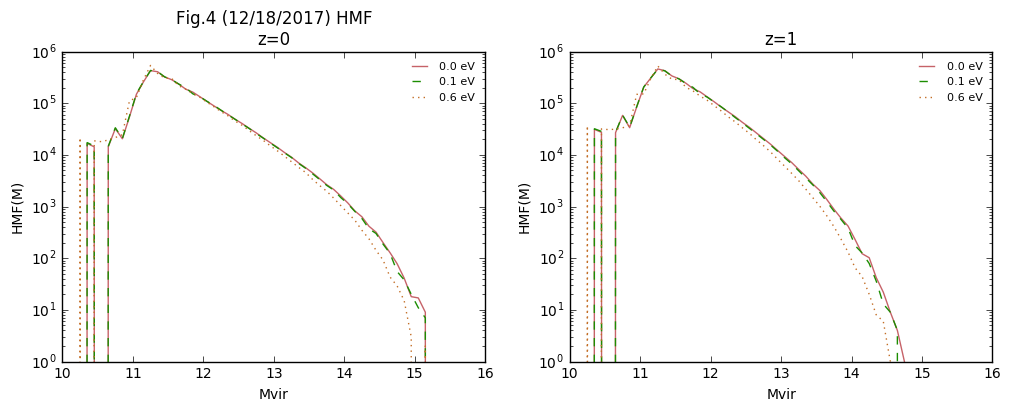

In [120]:
hist_bins=arange(10, 15.5, 0.1)
hist_center=hist_bins[:-1]+0.05

iseed=10024
f=figure(figsize=(12,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

seed(iseed)
ax1.plot(hist_center,hmf00_z0,'-',color=rand(3),label='0.0 eV')
ax1.plot(hist_center,hmf01_z0,'--',color=rand(3),label='0.1 eV')
ax1.plot(hist_center,hmf06_z0,':',color=rand(3),label='0.6 eV')
ax1.legend(fontsize=8,frameon=0,loc=0)
ax1.set_title('''Fig.4 (12/18/2017) HMF
z=0''')
ax1.set_ylabel('HMF(M)')
ax1.set_xlabel('Mvir')
ax1.set_yscale('log')

seed(iseed)
ax2.plot(hist_center,hmf00_z1,'-',color=rand(3),label='0.0 eV')
ax2.plot(hist_center,hmf01_z1,'--',color=rand(3),label='0.1 eV')
ax2.plot(hist_center,hmf06_z1,':',color=rand(3),label='0.6 eV')
ax2.legend(fontsize=8,frameon=0,loc=0)
ax2.set_title('z=1')
ax2.set_ylabel('HMF(M)')
ax2.set_xlabel('Mvir')
ax2.set_yscale('log')
show()

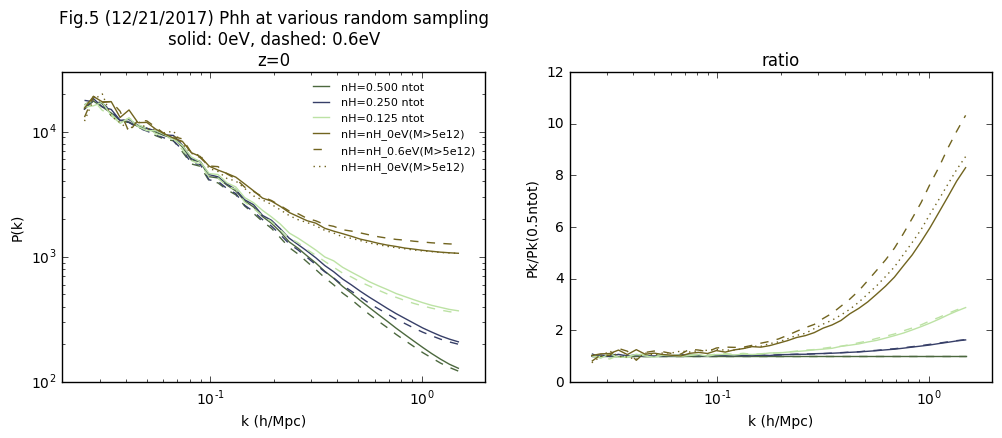

In [140]:
iseed=10027
f=figure(figsize=(12,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)
seed(iseed)
icolor='k'

for i in (2,4,8):
    icolor=rand(3)
    k0,ps0,ps6 = load('test_nH/Phh_random%i.npy'%(i))
    if i == 2:
        ps00, ps66 = ps0, ps6
    ax1.plot(k0, ps0,'-',color=icolor,label='nH=%.3f ntot'%(1./i))
    ax1.plot(k0, ps6,'--',color=icolor)
    ax2.plot(k0, ps0/ps00,'-',color=icolor,)
    ax2.plot(k0, ps6/ps66,'--',color=icolor,)
icolor=rand(3)
k0, ps0, ps6, ps6b = load('test_nH/Phh_random_5e12.npy')
ax1.plot(k0, ps0,'-',color=icolor,label='nH=nH_0eV(M>5e12)')
ax1.plot(k0, ps6,'--',color=icolor,label='nH=nH_0.6eV(M>5e12)')
ax1.plot(k0, ps6b,':',color=icolor,label='nH=nH_0eV(M>5e12)')
ax2.plot(k0, ps0/ps00,'-',color=icolor,)
ax2.plot(k0, ps6/ps66,'--',color=icolor,)
ax2.plot(k0, ps6b/ps66,':',color=icolor,)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('P(k)')
ax1.set_xlim(2e-2,2)
ax1.set_ylim(1e2,3e4)
ax1.set_title('''Fig.5 (12/21/2017) Phh at various random sampling
solid: 0eV, dashed: 0.6eV
z=0''')
ax1.legend(loc=0,frameon=0,fontsize=8)
ax1.set_xlabel('k (h/Mpc)')

ax2.set_ylabel('Pk/Pk(0.5ntot)')
ax2.set_xlim(2e-2,2)
ax2.set_xscale('log')
ax2.set_xlabel('k (h/Mpc)')
ax2.set_title('ratio')

show()